In [126]:
import networkx as nx
import pandas as pd

H1 = nx.read_edgelist('co_donor_relabeled_nodes.txt',nodetype=str,delimiter='\t!\t')#data=(('number_of_codonors',int)))

print(nx.number_of_nodes(H1) )#should be 212
print( nx.number_of_edges(H1) )#should be 22366
print(nx.density(H1) )


212
22366
1.0


In [111]:
#get a list of the number of codonors
num_codonors_list = []
for e in H1.edges(data=True):
    #e is a tuple
    temp = (e[2])['number_of_codonors']
    num_codonors_list.append(temp)
#print(num_codonors_list)

#get a list of the edges and sort by num codonors
list_of_edges = []
for e in H1.edges(data=True):
    list_of_edges.append(e)
list_of_edges = sorted(H1.edges(data=True), key=lambda tup: tup[2]['number_of_codonors'])#sort by number of codonors
#print(list_of_edges)
#print(num_codonors_list)

#sort
num_codonors_list = sorted(num_codonors_list)


[  2.19680000e+04   2.52000000e+02   6.00000000e+01   3.00000000e+01
   2.80000000e+01   1.20000000e+01   7.00000000e+00   2.00000000e+00
   1.00000000e+00   1.00000000e+00   2.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]


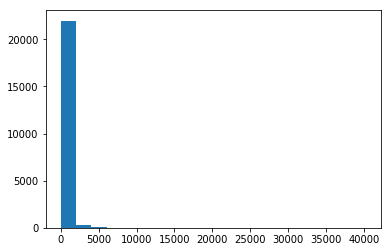

[ 1353.  2506.  3301.  3507.  2900.  2314.  1882.  1318.   826.]


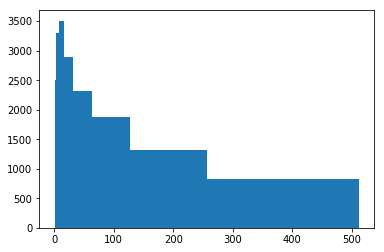

[ 1353.  2506.  3301.  3507.  2900.  2314.  1882.  1318.   826.]


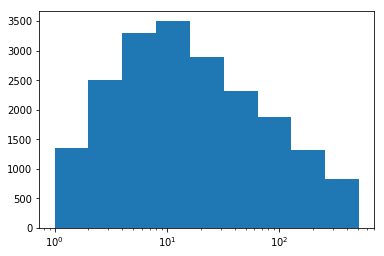

('TAMMY BALDWIN', 'ELIZABETH WARREN', {'number_of_codonors': 40203})


In [112]:
#want to plot distribution of num_codonors, each element of which is a value in the affinity matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

#Bunch of 0's for initial ones. The last sorted values are:
#..., 12946, 13815, 14003, 14022, 14520, 15825, 17183, 18845, 21054, 21388, 22655, 29957, 40203]

#https://stackoverflow.com/questions/34291260/how-can-i-plot-multiple-figure-in-the-same-line-with-matplotlib
#https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell
#https://matplotlib.org/gallery/subplots_axes_and_figures/multiple_figs_demo.html

data = sorted(num_codonors_list)
counts, bins, bars = plt.hist(data, bins=20)
print(counts)
plt.show()

bins = 2**(np.arange(0,10))
#plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

bins = 2**(np.arange(0,10))
plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

print(list_of_edges[-1])

[ 836.  162.   45.   26.   24.   11.    5.    2.    1.    1.    2.    1.
    0.    0.    1.    0.    0.    0.    0.    1.]


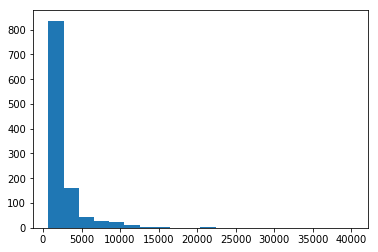

[ 151.  157.  108.  104.   83.   68.   31.   30.   28.   22.    9.    3.
    3.    1.]


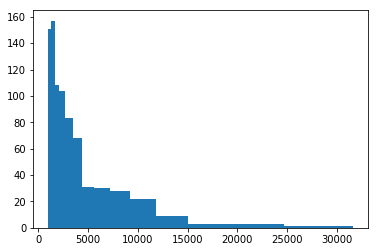

[ 151.  157.  108.  104.   83.   68.   31.   30.   28.   22.    9.    3.
    3.    1.]


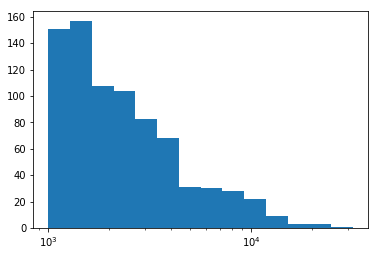

In [113]:
data = sorted(num_codonors_list[-1118:])
counts, bins, bars = plt.hist(data, bins=20)
print(counts)
plt.show()

bins = 10**(np.linspace(3,4.5, num=15))
#plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

bins = 10**(np.linspace(3,4.5, num=15))
plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

In [114]:
#Power law?
#Popularity is a common power law distribution. Since if you're more popular, you're more likely
#to get donors, and thus have donors in common with someone else, the edge weights resembling the power law
#distribution as well makes sense.
#There are always extremely popular items, and it's skewed in that direction, but most things aren't that popular.

#Note that this graph itself is a subsection of what the overall distribution would have been, because we've only
#selected more popular nodes as donors (the donor must have >= 1000 recipients).
#With those edges restored, the distribution would likely be clearer, but the graph would be too large then
#(especially since it's a complete graph).
#Similarly for the corecip graph, we selected more popular nodes as recipients (the recip must have >= 50 donors).

22366
alpha=  1.27105422764   sigma=  0.00181243326735


/Users/arjunrao/anaconda/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


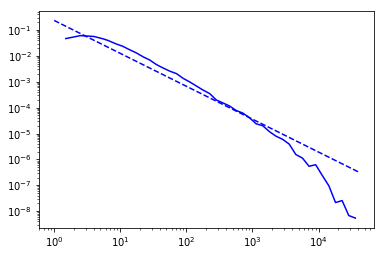

In [115]:

import powerlaw
import numpy as np

print(len(num_codonors_list))
%matplotlib inline
fit = powerlaw.Fit(np.array(num_codonors_list)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)


/Users/arjunrao/anaconda/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha=  1.28948474771   sigma=  0.00198594244438


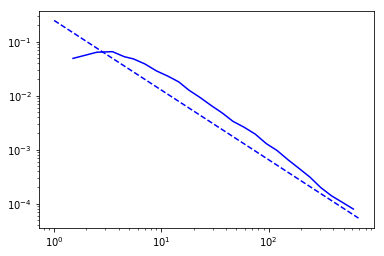

In [116]:
%matplotlib inline
#high bkt edges
fit = powerlaw.Fit(np.array(num_codonors_list[:-1118])+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

alpha=  1.1226485408   sigma=  0.00366810267647


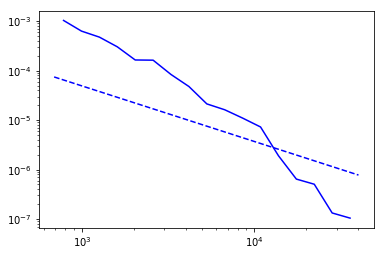

In [117]:
#power law doesn't fit as well for the last stretch of edges. Perhaps this reflects them being somewhat inaccurate?
#Maybe somewhere in the actual middle is better?
#But more likely, this just reflects the fact that power law may not be a great fit of the higher edges and data.
#It doesn't have to be power law, can be log normal or nothing really.
%matplotlib inline
#high bkt edges
fit = powerlaw.Fit(np.array(num_codonors_list[-1118:])+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

In [121]:
print(H1.nodes()[0])

ROBERT ANDREWS


In [134]:
#turns out there's a better way of storing the graph if you want all the node data, which is as a gpickle file.
H1 = nx.read_gpickle("codonor_graph_gpickle_test.gpickle")
#print(H1.nodes())



def mapping(full_name):
    
    if (full_name == "FOSTER, G. WILLIAM"):
        return "G WILLIAM FOSTER"#special case in terms of what is best in search results / shows up
    
    name = [x for x in full_name.split(',')]
    #name must be of length two.
    #The first 'name' is the lastname
    lastName = name[0]
    #rest of name is second part of 'name'. The firstName is that part split by spaces to get the first word
    #note there is a preceding space
    firstName = name[1].split(' ')[1]
    #godammit there's someone named W Todd Akin
    if (len(firstName) == 1 and len(name[1].split(' ')) > 2):#if we have 2+ names in the firstName middleName etc
        firstName = name[1].split(' ')[2]
    return firstName + " " + lastName

#H1=nx.relabel_nodes(H1,mapping)

print(H1.nodes())

for v in H1.nodes():     
    print(H1.node[v]['ideo'])

nx.write_gpickle(H1, "codonor_graph_gpickle_test.gpickle")
print('written')


IndexError: list index out of range

In [136]:
#Ok, now we can access the graph with full information.
#Do some analysis on this now that we have things like the ideo. Specifically:
# H1.add_node(recipient_name_2, name=recipient_name_2,race=recipient_race_2,region=recipient_region_2,
#                            win=recipient_win_2, number_of_donors=recipient_number_of_contributers_2,
#                            amount=recipient_amount_2,party=recipient_party_2, ideo=recipient_ideo_2)

#relationship/correlation between amount received and ideo?
#For edges in the graph:
    #relationship between weight (num donors in common) and ideo of the recipients? ideo isn't what you'd think
    #relationship between weight (num donors in common) and amount each recipient received?
    #region: Most liberal, Some liberal, Most conservative, Some conservative, and Average. Maybe can correlate? idk.
    #people who won probably were donated more. Start there.
H1 = nx.read_gpickle("codonor_graph_gpickle_test.gpickle")

for v in H1.nodes():
    print(H1.node[v])
    print(H1.node[v]['ideo'])

{'name': 'ANDREWS, ROBERT E', 'win': 'W', 'race': 37.0, 'number_of_donors': 1229, 'amount': 867263, 'party': '100', 'ideo': -0.40625100000000003, 'region': 'Some liberal'}
-0.40625100000000003
{'name': 'SANDERS, BERNARD', 'race': 45.0, 'region': 'Most liberal', 'win': 'W', 'number_of_donors': 19384, 'amount': 1684279, 'party': '100', 'ideo': -1.5785460936581002}
-1.5785460936581002
{'name': 'ALLEN, GEORGE', 'race': 5.0, 'region': 'Most liberal', 'win': 'L', 'number_of_donors': 7144, 'amount': 9531156, 'party': '200', 'ideo': 0.9668387783220649}
0.9668387783220649
{'name': 'BACHUS, SPENCER THOMAS', 'race': 43.0, 'region': 'Most conservative', 'win': 'W', 'number_of_donors': 1099, 'amount': 1099555, 'party': '200', 'ideo': 0.768505}
0.768505
{'name': 'ROYCE, EDWARD R', 'race': 4.0, 'region': 'Most liberal', 'win': 'W', 'number_of_donors': 1404, 'amount': 1740662, 'party': '200', 'ideo': 0.8609370000000001}
0.8609370000000001
{'name': 'HOEKSTRA, PETER', 'race': 21.0, 'region': 'Some liber